Call option simulation

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
strike_price = 10
interest_rate = 0.05
volatility = 0.25
spot_time = 0.5
nsim = 10000
initial_value = 12
step_size = 0.01

In [139]:
def stock_sim(volatility, spot_time, initial_value, interest_rate, step_size):
    stock_price = np.zeros(int(spot_time/step_size) + 1)
    stock_price[0] = initial_value
    for i in range(int(spot_time/step_size)):
        stock_price[i+1] = stock_price[i] + step_size*stock_price[i]*(interest_rate+volatility*np.random.normal(loc=0,scale=1))
    return stock_price
        
        

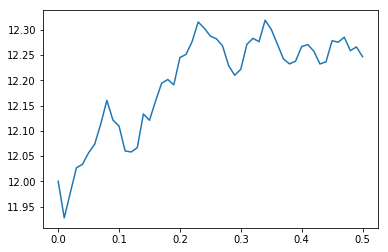

In [140]:
Y = stock_sim(volatility=volatility,spot_time=spot_time,initial_value=initial_value,interest_rate=interest_rate,step_size=step_size)
X = x = np.linspace(start=0,stop=spot_time,endpoint=True,num=int(spot_time/step_size)+1)
plt.plot(X,Y)

In [141]:
call_price = 0
for i in range(nsim) :
    stock_price = stock_sim(volatility=volatility,spot_time=spot_time,initial_value=initial_value,interest_rate=interest_rate,step_size=step_size)
    call_price = call_price + np.exp(interest_rate*spot_time)*max(stock_price[int(spot_time/step_size)]-strike_price,0)
call_price = call_price/nsim
call_price

2.3640392984048115

With the black-scholes-merton formula:

In [142]:
def black_scholes(volatility, spot_time, initial_value, interest_rate, strike_price ) :
    d_1 = (np.log(initial_value/strike_price) + (interest_rate + 1/2*volatility**2)*spot_time)/(volatility*np.sqrt(spot_time))
    d_2 = (np.log(initial_value/strike_price) + (interest_rate - 1/2*volatility**2)*spot_time)/(volatility*np.sqrt(spot_time))
    Call_price = initial_value*norm.cdf(d_1) - strike_price*np.exp(interest_rate*spot_time)*norm.cdf(d_2)
    return Call_price
    

In [143]:
Call_price=black_scholes(volatility=volatility,spot_time=spot_time,initial_value=initial_value,interest_rate=interest_rate, strike_price = strike_price)
Call_price

1.9295268608803404